In [6]:
# Handle all my imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

ModuleNotFoundError: No module named 'sklearn'

In [7]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


# 1. Introduction
Supervised learning use cases examples

- How much will be the daily, monthly, and yearly sales for agiven store for the next three years?
- How many car parking spaces should be allocated for a retail store?
- How much will be my monthly electricity cost for the next three years?
- What will be the temperature for the next five days?

The presence of the words ‘how much’ and ‘how
many’ implies that the answer for these questions will be a quantitative or continuous
number. The regression is one of the fundamental techniques that will help us to find answers to these types of questions by studying the relationship between the different
variables that are relevant to the questions that we are trying to answer.

<b>Example: </b>
Let’s consider a use case where we have collected students’ average test grade scores
and their respective average number of study hours for the test for group of similar IQ
students.

In [2]:
data = {'Hours_Studied': [2,3,4,5,6,7,8,9,10],
       'Test_Grade':[57,66,73,76,79,81,90,96,100]}
df = pd.DataFrame(data)
df.head()

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79


In [3]:
df.corr()

,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.987797
Test_Grade,0.987797,1.000000


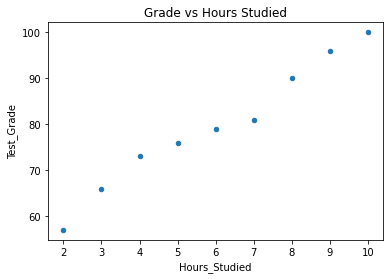

In [4]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()

A simple scatter plot with hours studied on the x-axis and the test grades on the
y-axis shows that <b>the grade gradually increases with the increase in hours of study</b>. 

This implies that there is a linear relationship between the two variables. Further performing
the correlation analysis shows that there is 98% positive relationship between the two
variables, which means there is 98% chance that any change in study hours will lead to a
change in grade.

## 2. Linear Regression Model

For a given positive interger $n$, Linear Regression assumes the following model: 
 
 $$Y = X\alpha+ \beta  + \epsilon,$$
where
- $X = [X_1, \cdots, X_n], X_i \in R^m$ is the list of independant variables (explanatory),
- $Y\in R^m$ is the dependant variable (Target) 
- $\alpha^T = [\alpha_1, \cdots, \alpha_n]$ is list of coefficients called slope, 
- $\beta\in R^m$ in called the intercept, 
- $\epsilon \in R^m$ is the error that cannot be explained by model.

 
Let's use the linear regression function from the <b>scikit-learn</b> library to find the values of $\alpha$ and $\beta$.

Let us denote $\hat{Y}$ the mean value of  $Y$ i.e.$$\hat{Y} = \dfrac{1}{n}\sum_{1}^n y_i $$

## 2.1. How good is your model?
There are three metrics widely used for evaluating linear model performance.
### 2.1.1. R-Squared for goodness of fit

The R-squared metric is the most popular practice of evaluating how well your model fits
the data. 
$$ \text{R-squared} = 1 - \dfrac{\sum_{1}^n(e_i)^2}{\sum_{1}^n(Y_i -\bar{Y})^2} $$
It is a value between 0 and 1; the value
toward 1 indicates a better model fit. It can be computed with <b>r2_score</b> python function.

### 2.1.2. Mean Absolute Error (MAE)

The Mean Absolute Error, denoted MAE, is the mean or average of absolute value of the errors.
$$\text{MAE}= \dfrac{1}{n}\sum_{1}^n \mid e_i\mid $$

MAE indicates how close the
predicted values are to the actual values; hence a lower MAE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_absolute_error</b> python function. 


### 2.1.3. Root Mean Squared Error (RMSE)
This is the square root of the mean of the squared errors. 

$$\text{MAE}= \sqrt{\dfrac{1}{n}\sum_{1}^n  (e_i)^2} $$
RMSE indicates how close the
predicted values are to the actual values; hence a lower RMSE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_squared_error</b> python function. 


### 2.2. Single variable Linear regression ($m=1$)

Let’s consider a use case where we have collected students's average python mark
and their respective average mark in the review phase.

In [5]:
df = pd.read_csv('PythonEffect.csv')
# print(df.info())
df.head()

,PythonMark,ReviewPhaseMark
0,6,6
1,5,6
2,8,10
3,14,15
4,10,10


In [6]:
df.corr()

,PythonMark,ReviewPhaseMark
PythonMark,1.000000,0.904868
ReviewPhaseMark,0.904868,1.000000


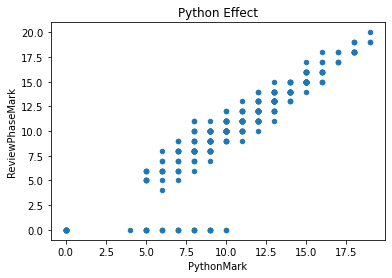

In [7]:
# Simple scatter plot
df.plot(kind='scatter', x='PythonMark', y='ReviewPhaseMark', title='Python Effect')
plt.show()

In [8]:
# Create linear regression object
Single_lr = LinearRegression()
# #Extract 
X= df.PythonMark.values.reshape(-1, 1) # independent variable
Y= df.ReviewPhaseMark.values.flatten() # dependent variable


In [9]:
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it
Single_lr.fit(X_train, Y_train)

LinearRegression()

In [10]:
# get the value of alpha and beta
alpha = Single_lr.coef_
beta = Single_lr.intercept_

# print the value of alpha and beta
print('alpha = ', alpha[0])
print('beta = ', beta)


alpha =  1.1096258969443358
beta =  -1.4936733199830208


In [11]:
# Make predictions using the testing set
Y_pred = Single_lr.predict(X_test)

# R-squared
print('R-squared: %.2f' % r2_score(Y_test, Y_pred))
# mean absolute error
print("mean absolute error: %.2f"% mean_absolute_error(Y_test, Y_pred))
# Mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))


R-squared: 0.79
mean absolute error: 1.21
Mean squared error: 4.22


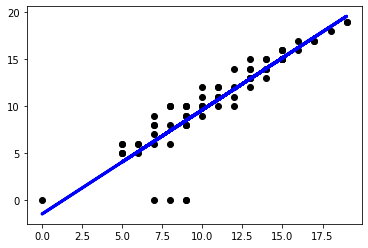

In [12]:
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.show()


### 2.3.  Multivariate Linear regression ($m>1$)

Let us consider the following data

In [13]:
# Import the data and inspect it
maths = pd.read_csv('student-mat.csv')
maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
print(maths.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

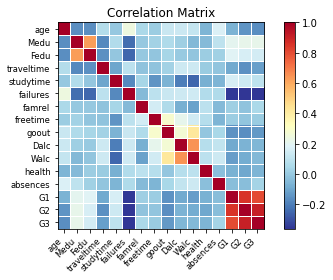

In [15]:
corr = maths.corr()
# maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [16]:
maths.sex.unique()#this is a categorical variable

array(['F', 'M'], dtype=object)

In [17]:
maths.famsize.unique()#this is a categorical variable

array(['GT3', 'LE3'], dtype=object)

<b>Note that sklearn can only accept numerical inputs</b>.

### 2.3.1. Pre-processing of labeled data
The categorical variables need to be handled appropriately before running the first
iteration of the model. Scikit-learn provides useful built-in preprocessing functions to
handle categorical variables.

- <b>LabelBinarizer</b>: This will replace the binary variable text withvnumeric vales. We'll be using this function for the binary categorical variables.

- <b>LabelEncoder</b>: This will replace category level with number representation.

- <b>OneHotEncoder</b>: This will convert n levels to n-1 new variable, and the new variables will use 1 to indicate the presence of level and 0 for otherwise. Note that before calling <b>OneHotEncoder</b>, we should use <b>LabelEncoder</b> to convert levels to number. Alternatively we can achieve the same using get_dummies of the Pandas package. This is much more efficient to use as we can directly use it on the column with text description without having to convert to numbers first.

In [18]:
# # Convert binary variable 'sex' to numeric boolean fields
lb = LabelBinarizer()
maths.sex = lb.fit_transform(maths.sex)
maths.sex.unique()

array([0, 1])

In [19]:
# # Convert binary variable 'famsize' to numeric boolean fields
maths.famsize = lb.fit_transform(maths.famsize)
maths.famsize.unique()

array([0, 1])

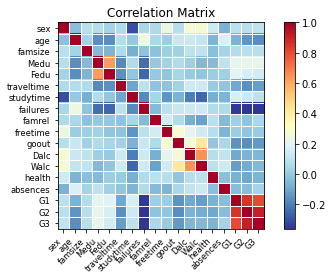

In [20]:
corr = maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()



In [21]:
maths = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2', 'G3']]


MX = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2']].values.reshape(-1, 7)
MY = maths['G3'].values.flatten()

In [22]:
# split-up our current X & y variables into training
# and testing data.
MX_train, MX_test, MY_train, MY_test = train_test_split(MX,MY, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it

Multi_lr = LinearRegression()
Multi_lr.fit(MX_train, MY_train)

LinearRegression()

In [23]:
# Lets take a look at how well this model preforms
print("The R-Squared: ", Multi_lr.score(MX_test, MY_test))
alpha = Multi_lr.coef_
beta = Multi_lr.intercept_

for i in range(alpha.size):
    print(maths.columns[i], ': ', alpha[i])
print('The intercept of our slope is: ', beta)

The R-Squared:  0.7983552161587196
sex :  0.16476928111566563
famsize :  -0.020837379216875864
studytime :  -0.043940699688089634
famrel :  0.3631349649085571
absences :  0.04105103296124567
G1 :  0.15698723303548884
G2 :  0.9987849801717963
The intercept of our slope is:  -3.683923561369623


In [24]:
MY_pred = Multi_lr.predict(MX_test)
print('Mean Absolute Error:', mean_absolute_error(MY_test, MY_pred))  
print('Mean Squared Error:', mean_squared_error(MY_test, MY_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(MY_test, MY_pred)))

Mean Absolute Error: 1.3100825502382831
Mean Squared Error: 4.134735824024409
Root Mean Squared Error: 2.0334049827873466
